In [1]:
import earthkit as ek

ds = ek.data.from_source("sample", "tquv_pl_2x2.grib")

In [2]:
from earthkit.meteo import thermo

# select temperature fields
t = ds.sel(param="t")
q = ds.sel(param="q")

res = []

# loop and perform the computation per field, i.e per level
for f_t, f_q in zip(t,q):
    pres_pa = f_t.metadata("level") * 100 # Pa
    t_vals = f_t.values
    q_vals = f_q.values
    
    # do the computation
    r_vals = thermo.relative_humidity_from_specific_humidity(t_vals, q_vals, pres_pa)
    print(f"t_mean={t_vals.mean():.2f} p={pres_pa} r_mean={r_vals.mean():.2f}")
    
    # encode a new GRIB field (in memory)
    md = f_t.metadata().override(shortName="r")
    f_new = f_t.copy(values=r_vals, metadata=md)
    
    res.append(f_new)

# create the resulting fieldlist    
ds_r = ek.data.FieldList.from_fields(res)

t_mean=283.60 p=100000 r_mean=68.38
t_mean=277.18 p=85000 r_mean=63.56
t_mean=269.78 p=70000 r_mean=52.34
t_mean=255.20 p=50000 r_mean=48.28
t_mean=244.23 p=40000 r_mean=50.57
t_mean=230.08 p=30000 r_mean=52.11


In [3]:
ds_r.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,r,isobaricInhPa,1000,20180801,1200,0,an,0,regular_ll
1,ecmf,r,isobaricInhPa,850,20180801,1200,0,an,0,regular_ll
2,ecmf,r,isobaricInhPa,700,20180801,1200,0,an,0,regular_ll
3,ecmf,r,isobaricInhPa,500,20180801,1200,0,an,0,regular_ll
4,ecmf,r,isobaricInhPa,400,20180801,1200,0,an,0,regular_ll
5,ecmf,r,isobaricInhPa,300,20180801,1200,0,an,0,regular_ll


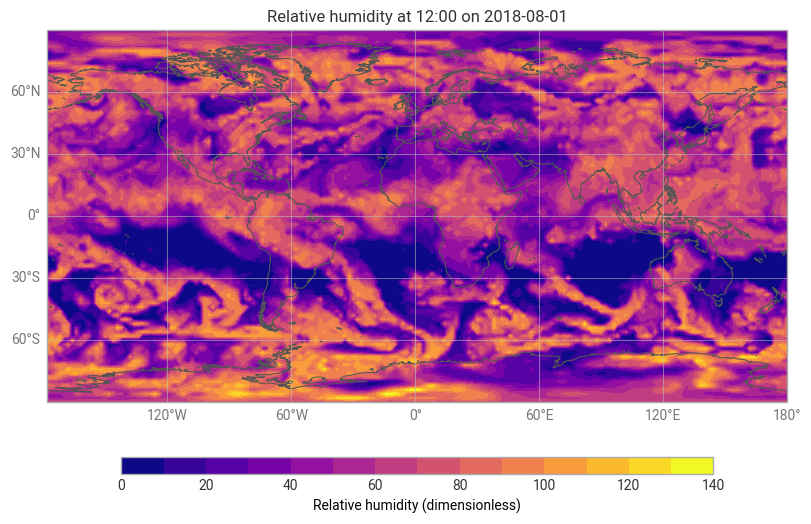

In [4]:
ek.plots.quickplot(ds_r.sel(level=700)).show()